In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from filters.clahe import apply_clahe_luminance
from filters.sharpen import apply_unsharp_mask_luminance
from filters.gamma_visual import apply_gamma_correction
from filters.generic_filter import apply_tactical_recognition

In [ ]:
img_path = Path("/Users/felipe/Developer/cv-snippets/data/image/example00001.jpg")  # ajustá al path real
image_bgr = cv2.imread(str(img_path))

if image_bgr is None:
    raise ValueError("Could not load image")

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [44]:
def show_image(img, title="", figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_side_to_side(img1, img2, title1="", title2="", figsize=(15, 6)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")
    
    plt.show()

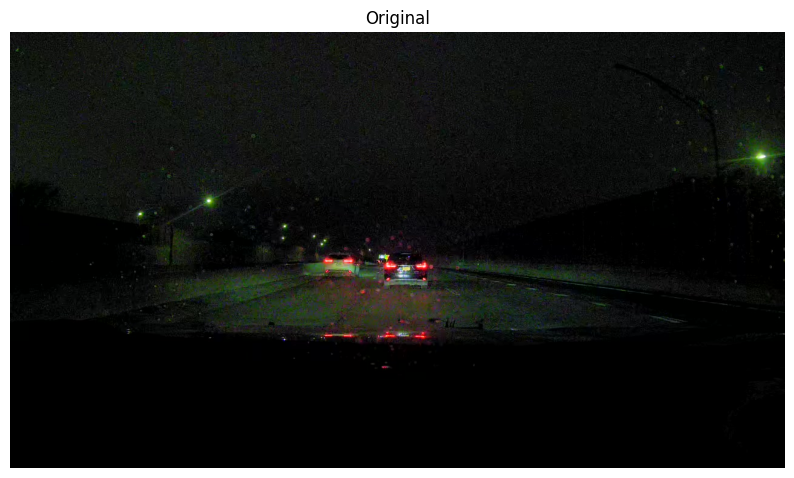

In [31]:
show_image(image_rgb, title="Original")

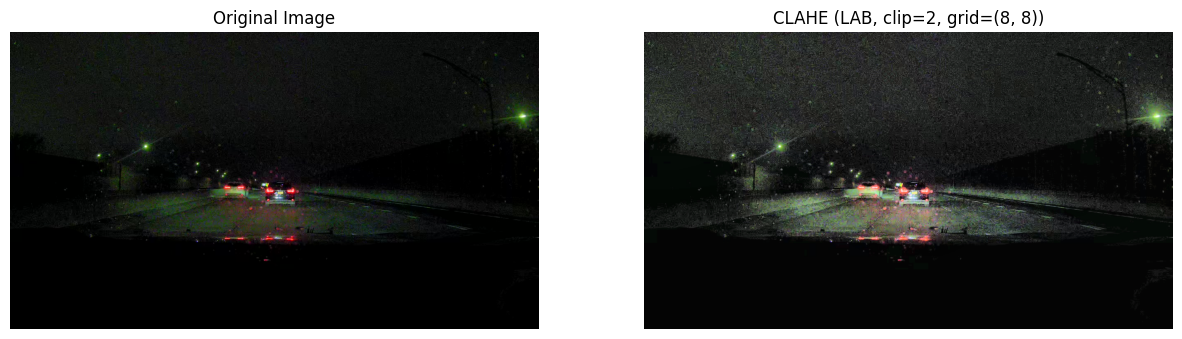

In [45]:
clipe_limit = 2
tile_grid_size = (8, 8)

clahe_bgr = apply_clahe_luminance(image_bgr,clip_limit=clipe_limit,tile_grid_size=tile_grid_size,colorspace="LAB")

clahe_rgb = cv2.cvtColor(clahe_bgr, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, clahe_rgb, title1="Original Image", title2=f"CLAHE (LAB, clip={clipe_limit}, grid={tile_grid_size})")

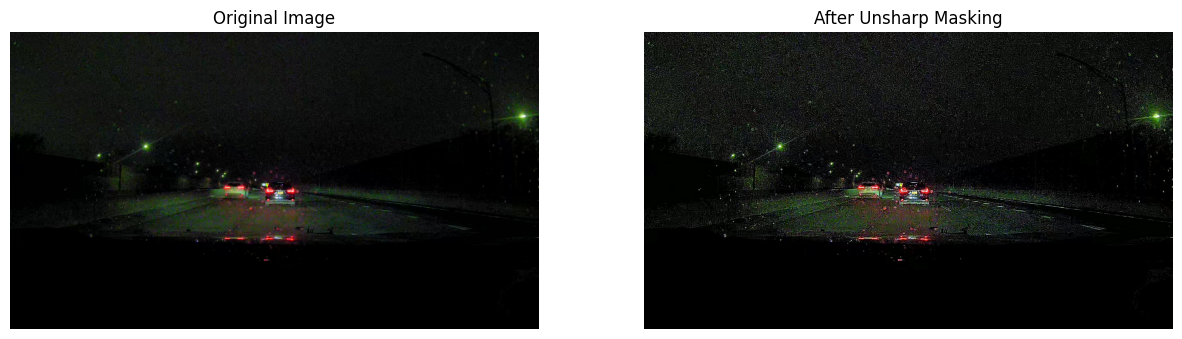

In [49]:
sharpened_bgr = apply_unsharp_mask_luminance(image_bgr, strength=5, sigma=1.0, colorspace="LAB")
sharpened_rgb = cv2.cvtColor(sharpened_bgr, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, sharpened_rgb, title1="Original Image", title2="After Unsharp Masking")

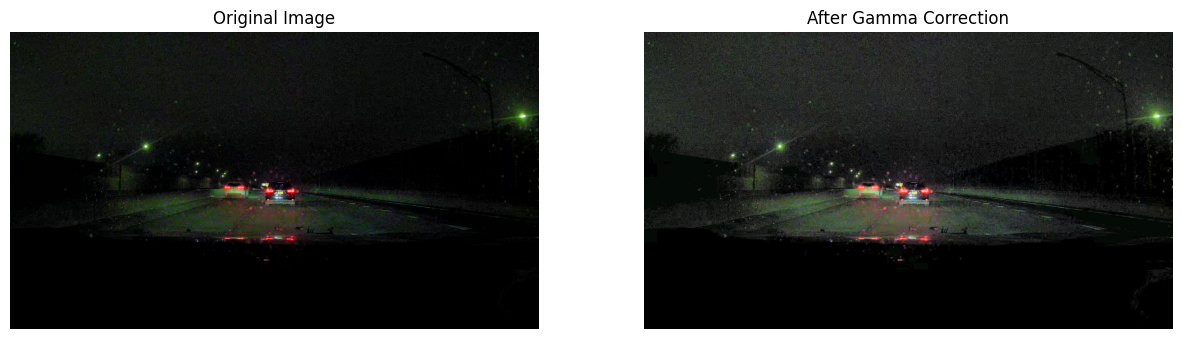

In [47]:
gamma_corrected_bgr = apply_gamma_correction(image_bgr, gamma=1.5, colorspace="LAB")
gamma_corrected_rgb = cv2.cvtColor(gamma_corrected_bgr, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, gamma_corrected_rgb, title1="Original Image", title2="After Gamma Correction")

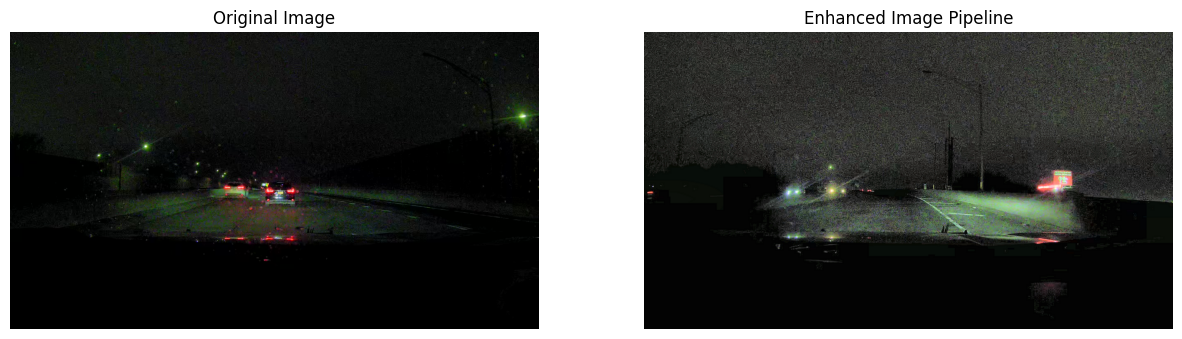

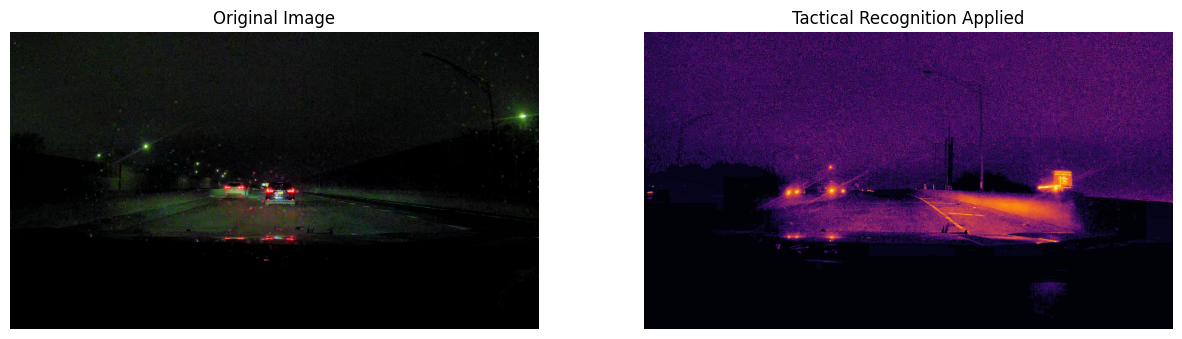

In [ ]:
# Pipeline 
gamma_level = 1.5
clahe_clip = 1
clahe_grid = (8, 8)
sharpen_strength = 0.3
sharpen_sigma = 0.5

enhanced_bgr = apply_gamma_correction(image_bgr, gamma=gamma_level, colorspace="LAB")
enhanced_bgr = apply_clahe_luminance(enhanced_bgr, clip_limit=clahe_clip, tile_grid_size=clahe_grid, colorspace="LAB")
enhanced_bgr = apply_unsharp_mask_luminance(enhanced_bgr, strength=sharpen_strength, sigma=sharpen_sigma, colorspace="LAB")
enhanced_rgb = cv2.cvtColor(enhanced_bgr, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, enhanced_rgb, title1="Original Image", title2="Enhanced Image Pipeline")
tactical_recognition_img = apply_tactical_recognition(enhanced_bgr)
tactical_recognition_rgb = cv2.cvtColor(tactical_recognition_img, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, tactical_recognition_rgb, title1="Original Image", title2="Tactical Recognition Applied")

In [53]:
def apply_enhancement_pipeline(image_bgr, gamma_level, clahe_clip, clahe_grid, sharpen_strength, sharpen_sigma):
    enhanced_bgr = apply_gamma_correction(image_bgr, gamma=gamma_level, colorspace="LAB")
    enhanced_bgr = apply_clahe_luminance(enhanced_bgr, clip_limit=clahe_clip, tile_grid_size=clahe_grid, colorspace="LAB")
    enhanced_bgr = apply_unsharp_mask_luminance(enhanced_bgr, strength=sharpen_strength, sigma=sharpen_sigma, colorspace="LAB")
    return enhanced_bgr

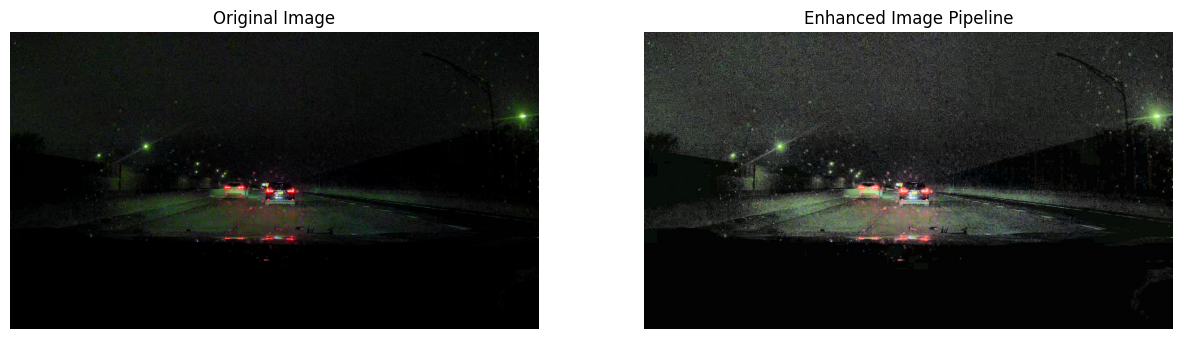

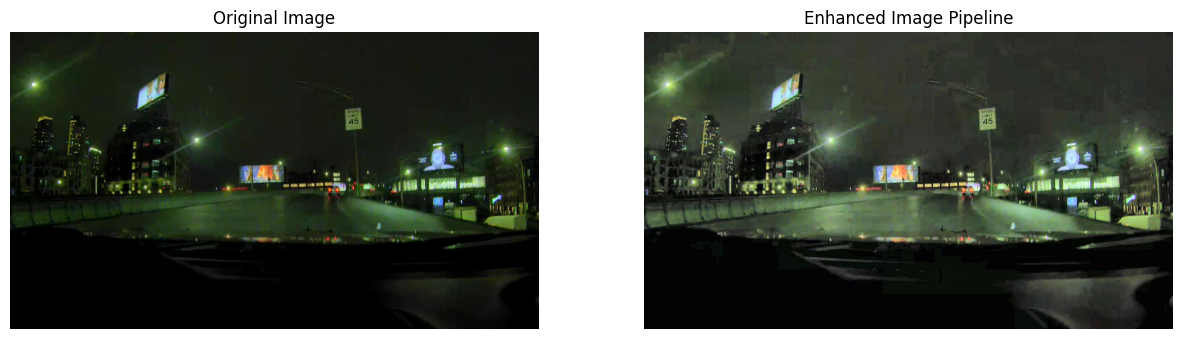

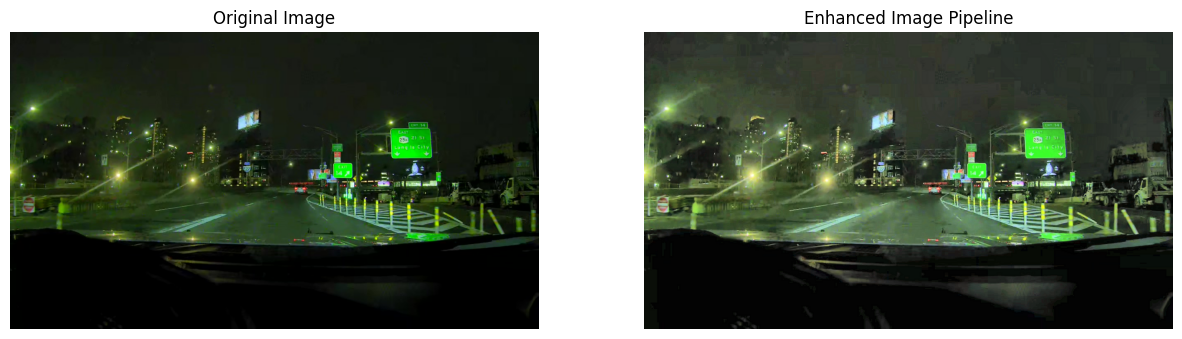

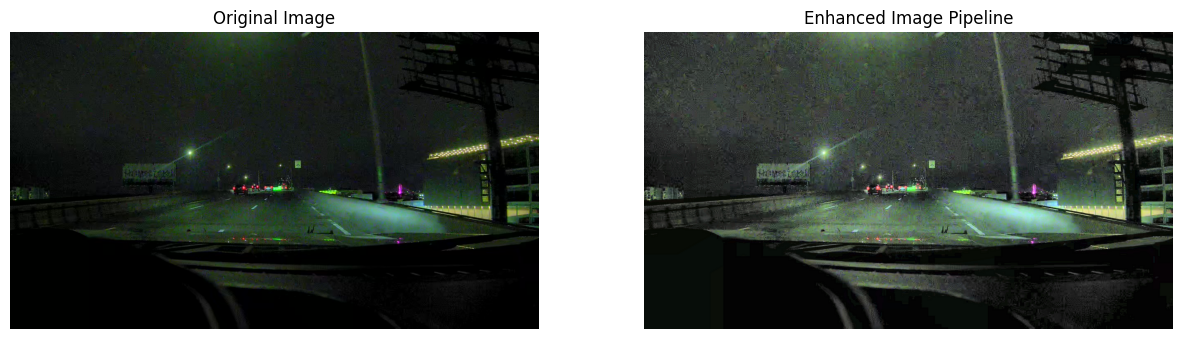

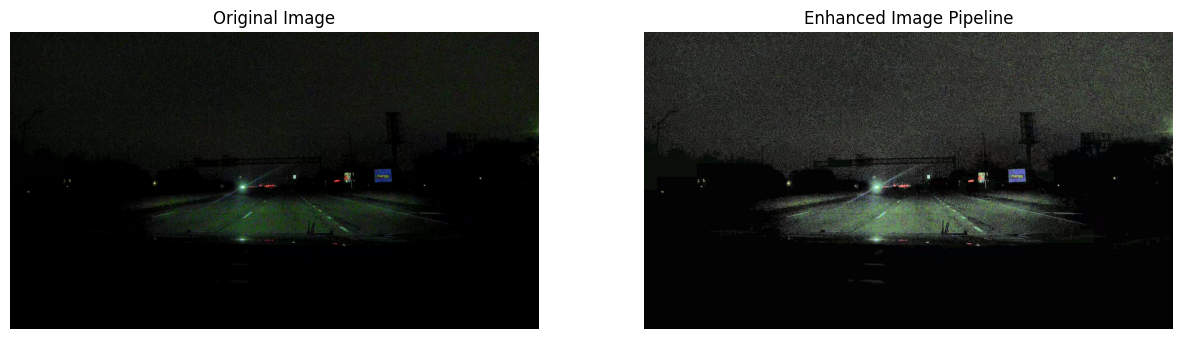

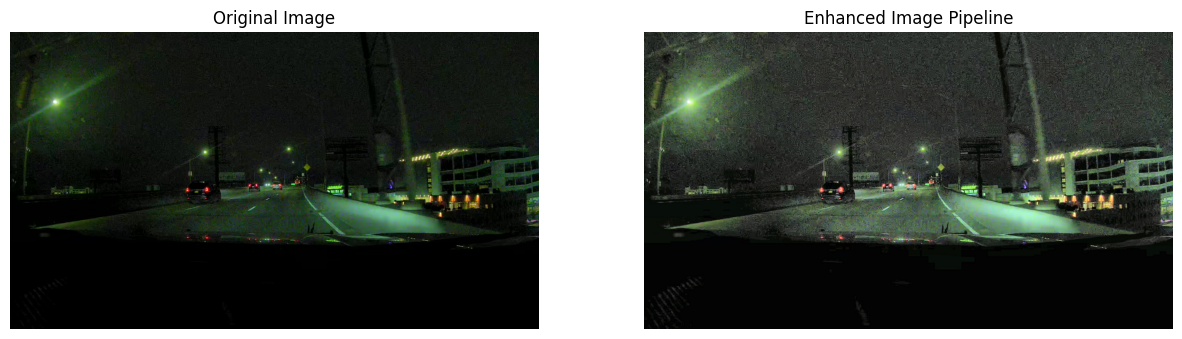

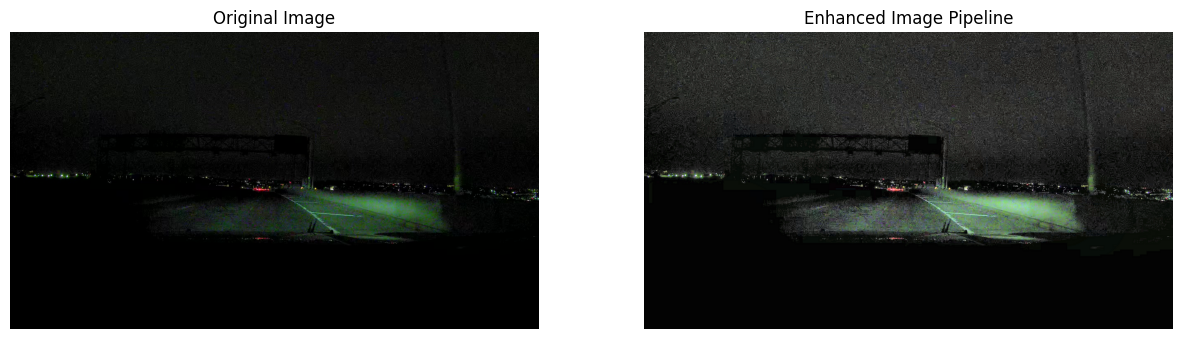

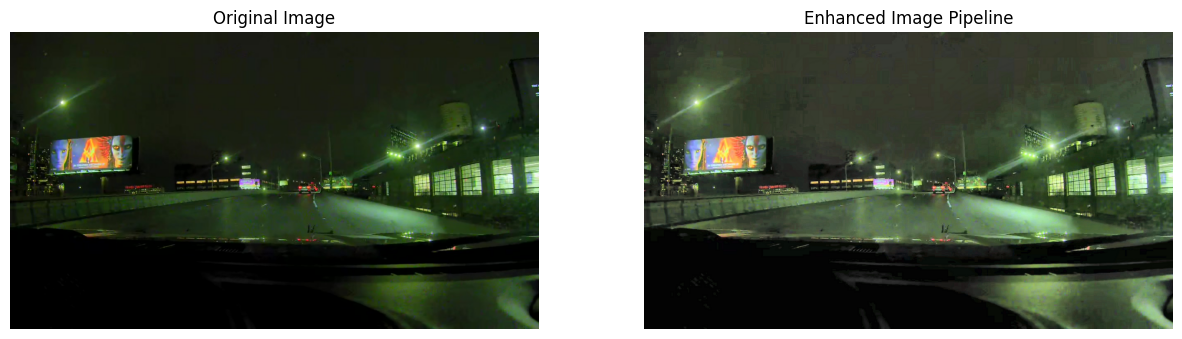

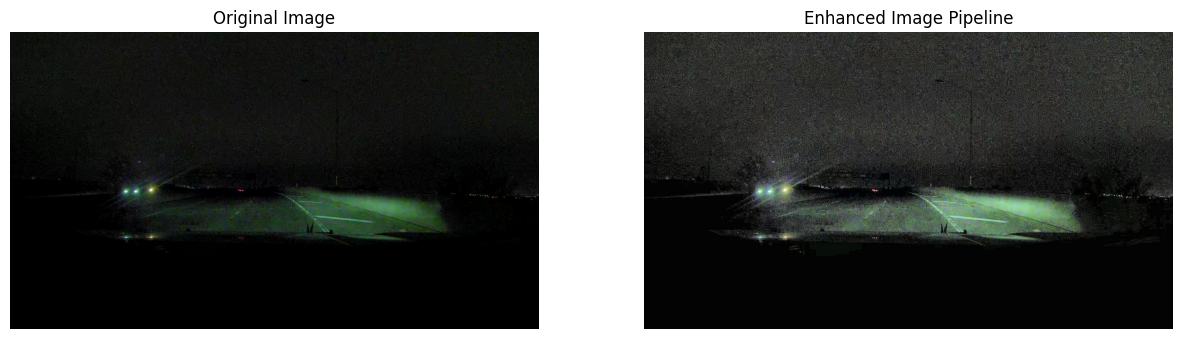

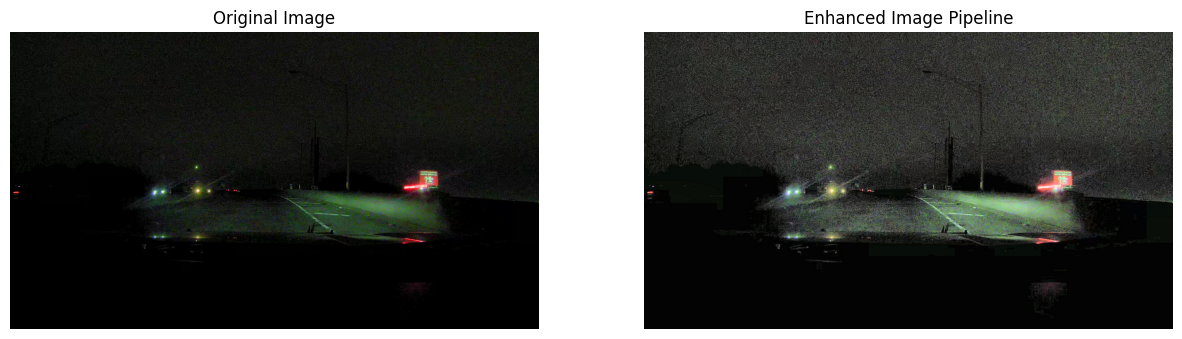

In [67]:
path_images_to_enhance = [p for p in Path("/Users/felipe/Developer/cv-snippets/data/image").iterdir() if p.suffix.lower() in [".jpg", ".jpeg", ".png"]]
for img_path in path_images_to_enhance:
    image_bgr = cv2.imread(str(img_path))
    enhanced_bgr = apply_enhancement_pipeline(image_bgr, gamma_level, clahe_clip, clahe_grid, sharpen_strength, sharpen_sigma)
    enhanced_rgb = cv2.cvtColor(enhanced_bgr, cv2.COLOR_BGR2RGB)
    show_side_to_side(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB), enhanced_rgb, title1="Original Image", title2="Enhanced Image Pipeline")

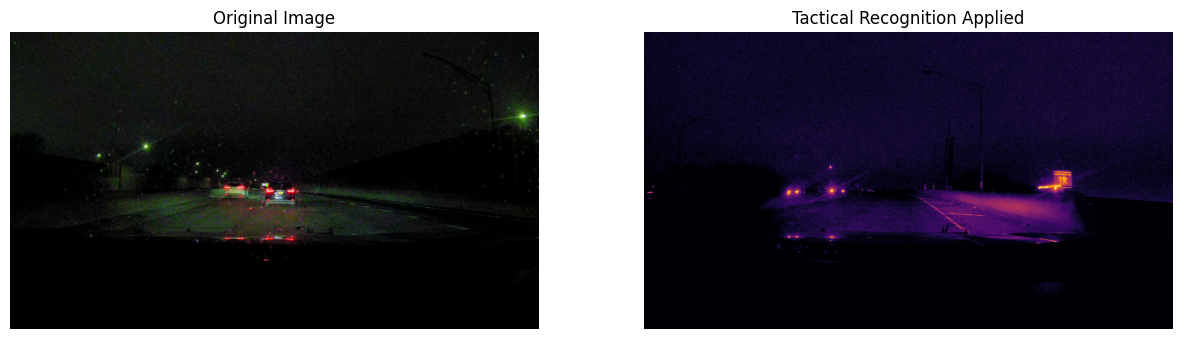

In [69]:
new = apply_tactical_recognition(image_bgr)
new_rgb = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
show_side_to_side(image_rgb, new_rgb, title1="Original Image", title2="Tactical Recognition Applied")